<a href="https://colab.research.google.com/github/RISHABH084/100-Days-Of-ML-Code/blob/master/Neural_Net_in_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

import torchvision

In [3]:
from torchvision import  transforms,datasets

In [4]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))



Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [6]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x,y=data[0][0],data[1][0]

In [8]:
import matplotlib.pyplot as plt
print(data[0][0].shape)

torch.Size([1, 28, 28])


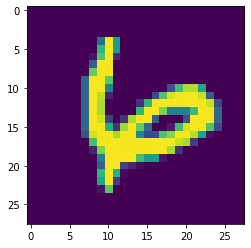

In [9]:
plt.imshow(data[0][0].view(28,28))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28,64)
    self.fc2=nn.Linear(64,64)  
    self.fc3=nn.Linear(64,64)  
    self.fc4=nn.Linear(64 ,10)


  def forward(self,x):

    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= F.relu(self.fc3(x))
    x= self.fc4(x)

    return F.log_softmax(x,dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X=torch.rand((28,28))


In [20]:
X=X.view(-1,28*28)

In [21]:
X.shape

torch.Size([1, 784])

In [22]:
output=net(X)

In [23]:
output

tensor([[-2.2868, -2.2392, -2.2401, -2.4425, -2.3588, -2.3595, -2.2895, -2.2322,
         -2.3163, -2.2806]], grad_fn=<LogSoftmaxBackward>)

In [24]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)
EPOCHS=3


In [26]:
for epoch in range(EPOCHS):
  for data in trainset:
    X,y= data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.2402, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)


In [31]:
correct =0 
total=0
# with torch.no_grad():
for data in trainset:
  X,y =data
  output = net(x.view(-1,784))
  for idx,i in enumerate(output):
    if torch.argmax(i) == y[idx]:
      correct +=1
    total +=1
  
print("Accuracy:" ,round(correct/total,3))        

Accuracy: 0.102


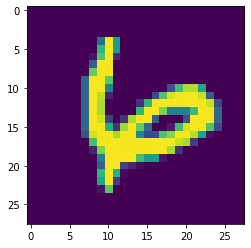

In [33]:
import matplotlib.pyplot as plt


plt.imshow(x[0].view(28,28))
plt.show()

In [34]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(4)
